In [62]:
from PIL import Image, ImageChops, ImageOps, ImageStat
import numpy as np
import matplotlib.pyplot as plt

def statystyki(im):
    s = ImageStat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe
    return


# Raport Lab 9 (13.12.2024)
Wykonany przez: Filip Połom

### Zad 1

Tryb: RGB


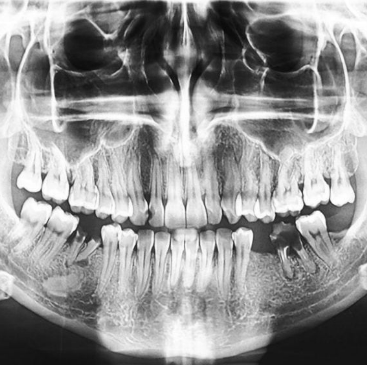

In [63]:
zeby = Image.open('pliki/zeby.png')
print(f"Tryb: {zeby.mode}")
zeby_l = zeby.convert('L')
zeby_l

### Zad 2.1

In [64]:
def histogram_norm(obraz):
    if obraz.mode != 'L':
        raise ValueError("Obraz musi być w trybie L (odcienie szarości).")
    w, h = obraz.size
    hist = obraz.histogram()
    liczba_pikseli = w * h
    hist_norm = [pixel / liczba_pikseli for pixel in hist]
    return hist_norm

### Zad 2.2

In [65]:
def histogram_cumul(obraz):
    hist_norm = histogram_norm(obraz)
    hist_kumul = np.cumsum(hist_norm)
    return hist_kumul

### Zad 2.3

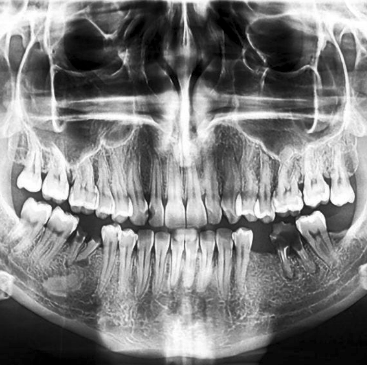

In [66]:
def equalization(obraz):
    hist_kumul = histogram_cumul(obraz)
    obraz1 = obraz.copy()
    pix_obraz = obraz1.load()
    w, h = obraz1.size
    for i in range(w):
        for j in range(h):
            p = pix_obraz[i, j]
            pix_obraz[i, j] = int(255 * hist_kumul[p])
    return obraz1

equalized = equalization(zeby_l)
equalized

### Zad 2.4

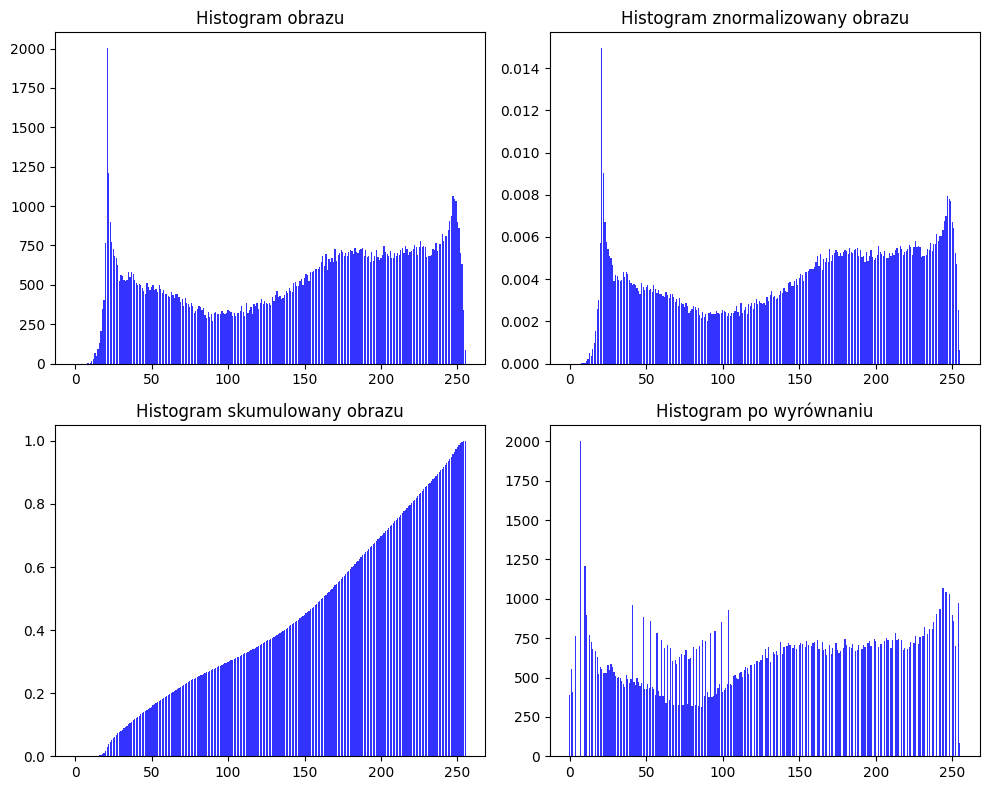

In [67]:
hist1 = zeby_l.histogram()
hist2 = histogram_norm(zeby_l)
hist3 = histogram_cumul(zeby_l)
hist4 = equalization(zeby_l).histogram()

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Histogram obrazu")
plt.bar(range(256), hist1[:], color='b', alpha=0.8)

plt.subplot(2, 2, 2)
plt.title("Histogram znormalizowany obrazu")
plt.bar(range(256), hist2[:], color='b', alpha=0.8)

plt.subplot(2, 2, 3)
plt.title("Histogram skumulowany obrazu")
plt.bar(range(256), hist3[:], color='b', alpha=0.8)

plt.subplot(2, 2, 4)
plt.title("Histogram po wyrównaniu")
plt.bar(range(256), hist4[:], color='b', alpha=0.8)

plt.tight_layout()

### Zad 2.5

In [68]:
diff = ImageChops.difference(zeby_l, equalized)
statystyki(diff)

extrema  [(0, 36)]
count  [133955]
mean  [19.7973871822627]
median  [18]
stddev  [10.311151143163304]


Pixele w obrazie po wyrównaniu histogramu są bardziej równomiernie rozłożone.

Kontrast drugiego obrazu jest zwiększony, co poprawia widoczność szczegółów.

Różne poziomy jasności są lepiej reprezentowane.

### Zad 3

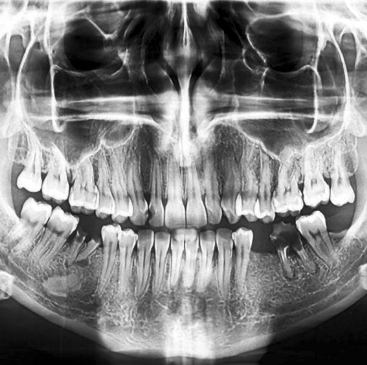

In [69]:
equalized1 = ImageOps.equalize(zeby_l)
equalized1

### Zad 3.1

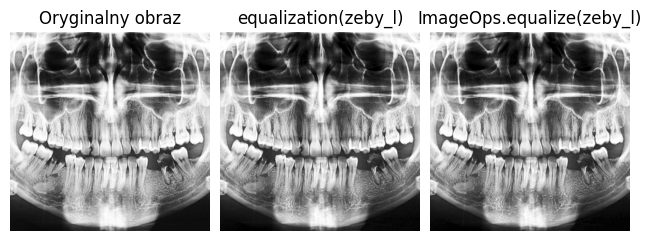

In [70]:
plt.figure(figsize=(8, 4))
plt.subplot(1,3,1)
plt.title("Oryginalny obraz")
plt.imshow(zeby_l, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title("equalization(zeby_l)")
plt.imshow(equalized, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title("ImageOps.equalize(zeby_l)")
plt.imshow(equalized1, cmap='gray')
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)

### Zad 3.2

In [71]:
diff = ImageChops.difference(equalized, equalized1)
statystyki(diff)

extrema  [(0, 3)]
count  [133955]
mean  [0.3799634205516778]
median  [0]
stddev  [0.585942738408389]


Obrazy są bardzo podobne, ale nie są identyczne.

Może to wynikać z kilku rzeczy:
* wartość pixela jest zaokrąglana przez int() (czyli w dół), a algorytm w funkcji wbudowanej może być inny
* funkcja wbudowana może inaczej liczyć wartości skrajne
* w własnoręcznie napisanej funkcji wykorzystujemy pełny zakres pixeli (0-255), gdzie funkcja wbudowana może działać inaczej (np. pomijać te wartości)

### Zad 4

In [72]:
def konwertuj1(obraz: Image, w_r: float, w_g: float, w_b: float) -> Image:
    if w_r < 0 or w_g < 0 or w_b < 0:
        raise ValueError('waga mniejsza od 0')
    if w_r > 1 or w_g > 1 or w_b > 1:
        raise ValueError('waga większa od 1')
    if abs(1 - w_r - w_g - w_b) > 1e-6:
        raise ValueError('wagi nie sumują się do 1')
    if obraz.mode != 'RGB':
        raise ValueError(f'Obraz musi być w trybie RGB, a jest w {obraz.mode}')
    obraz1 = obraz.copy()
    r, g, b = obraz1.split()
    pix = [r.load(), g.load(), b.load()]
    wagi = [w_r, w_g, w_b]
    w, h = obraz1.size
    wynik = Image.new('L', (w, h))
    pix_wynik = wynik.load()
    for i in range(w):
        for j in range(h):
            L = sum(pix[k][i, j] * wagi[k] for k in range(len(wagi)))
            pix_wynik[i, j] = round(L)
    return wynik

### Zad 4.1

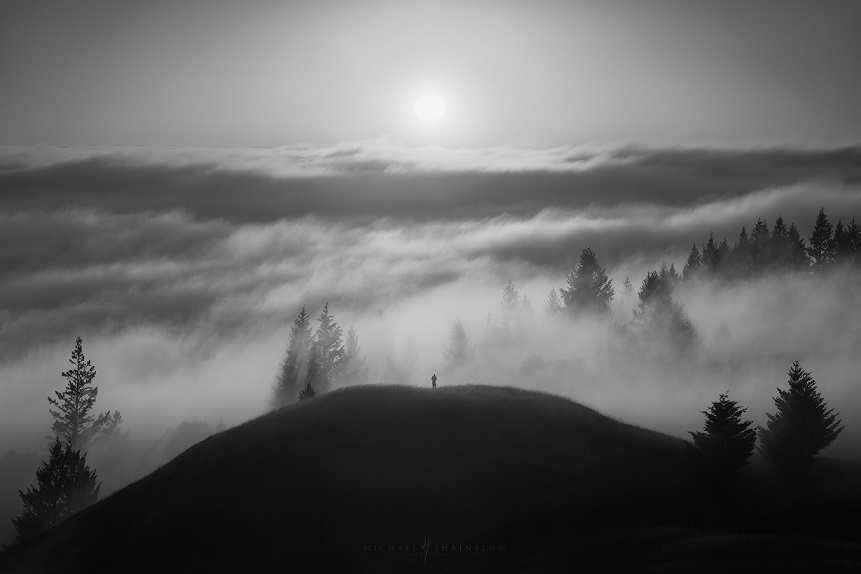

In [73]:
mgla = Image.open('pliki/mgla.jpg')
mgla_L1 = konwertuj1(mgla, 299 / 1000, 587 / 1000, 114 / 1000)
mgla_L1

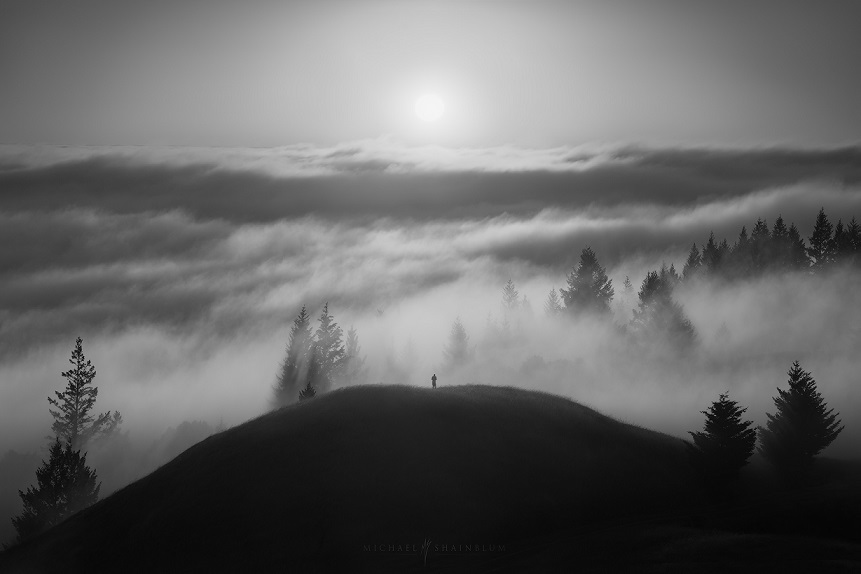

In [74]:
mgla_L = mgla.convert('L')
mgla_L

### Zad 4.2

In [75]:
diff = ImageChops.difference(mgla_L, mgla_L1)
statystyki(diff)

extrema  [(0, 1)]
count  [494214]
mean  [2.0234149578927345e-06]
median  [0]
stddev  [0.0014224664719017608]


Takie małe różnice mogą być spowodowane tym, jak funkcje zaokrąglają wyniki.

Komputery nie lubią liczb zmiennoprzecinkowych.

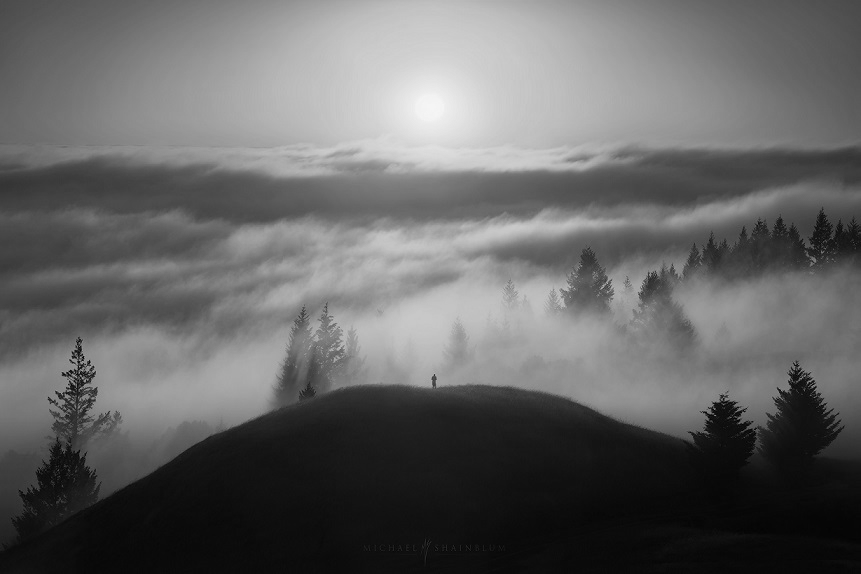

In [76]:
def konwertuj2(obraz: Image, w_r: float, w_g: float, w_b: float) -> Image:
    if w_r < 0 or w_g < 0 or w_b < 0:
        raise ValueError('waga mniejsza od 0')
    if w_r > 1 or w_g > 1 or w_b > 1:
        raise ValueError('waga większa od 1')
    if abs(1 - w_r - w_g - w_b) > 1e-6:
        raise ValueError('wagi nie sumują się do 1')
    if obraz.mode != 'RGB':
        raise ValueError(f'Obraz musi być w trybie RGB, a jest w {obraz.mode}')
    obraz1 = obraz.copy()
    r, g, b = obraz1.split()
    pix = [r.load(), g.load(), b.load()]
    wagi = [w_r, w_g, w_b]
    w, h = obraz1.size
    wynik = Image.new('L', (w, h))
    pix_wynik = wynik.load()
    for i in range(w):
        for j in range(h):
            L = sum(pix[k][i, j] * wagi[k] for k in range(len(wagi)))
            pix_wynik[i, j] = int(L)
    return wynik

mgla_L2 = konwertuj2(mgla, 299 / 1000, 587 / 1000, 114 / 1000)
mgla_L2

In [77]:
diff = ImageChops.difference(mgla_L, mgla_L2)
statystyki(diff)

extrema  [(0, 1)]
count  [494214]
mean  [0.4668969312888749]
median  [0]
stddev  [0.49890298339647815]


Różnice są większe, gdyż średnia różnic jest większa od poprzedniej.

int() zamiast round() ucina część dziesiętną wyniku, zamiast zaokrąglać w górę przy >=0.5 lub w dół w przeciwnym wypadku.